In [7]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from seaborn import set_style
import matplotlib.pyplot as plt
import numpy as np
set_style('whitegrid')

In [11]:
data = pd.read_csv('1985-2022.csv',parse_dates=['Year'])
#data['year_month'] = pd.to_datetime(data['year_month'])
data['y'] = data['Year'].dt.year
data['m'] = data['Year'].dt.month
data['w'] = data['Year'].dt.week
data

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '16-06-1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '23-06-1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '30-06-1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/py

,Year,Show_name,Potential_Gross,Difference,Average_ticket,Seats_Sold,Seats_in_theater,Previews,%cap,diff_cap,y,m,w
0,1985-09-06,42nd Street,0.0,0.00,30.42,9281,1655,8,70.10,0.00,1985,9,36
1,1985-09-06,A Chorus Line,0.0,0.00,27.25,8167,1472,8,69.35,0.00,1985,9,36
2,1985-09-06,Aren't We All?,0.0,0.00,33.75,7386,1088,8,84.86,0.00,1985,9,36
3,1985-09-06,Arms and the Man,0.0,0.00,20.87,4586,682,8,84.05,0.00,1985,9,36
4,1985-09-06,As Is,0.0,0.00,20.78,2938,684,8,53.69,0.00,1985,9,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47715,2022-08-05,The Phantom of the Opera,742308.2,117127.78,94.60,7847,1605,8,61.11,9.18,2022,8,31
47716,2022-08-05,The Skin of Our Teeth,174481.0,33370.00,52.81,3304,1058,8,39.04,-8.27,2022,8,31
47717,2022-08-05,Tina: The Tina Turner Musical,1065578.2,193232.80,122.56,8694,1478,8,73.53,14.13,2022,8,31
47718,2022-08-05,Wicked,1341127.0,144364.00,119.06,11264,1807,8,77.92,4.53,2022,8,31


In [12]:
data_2005 = data[data['y']==2005]

In [13]:
data_2005

,Year,Show_name,Potential_Gross,Difference,Average_ticket,Seats_Sold,Seats_in_theater,Previews,%cap,diff_cap,y,m,w
22993,2005-02-01,'night Mother,644317.0,94955.0,52.16,3565,1078,8,41.34,21.08,2005,2,5
22994,2005-02-01,42nd Street,1069078.0,369596.0,78.11,14448,1813,8,99.61,18.21,2005,2,5
22995,2005-02-01,700 Sundays,742094.0,28581.0,97.11,8401,1186,7,101.19,0.27,2005,2,5
22996,2005-02-01,Avenue Q,516205.0,5745.0,86.85,6368,796,8,100.00,0.00,2005,2,5
22997,2005-02-01,Beauty and the Beast,845808.0,290172.0,86.47,12074,1509,8,100.02,19.73,2005,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24507,2005-12-25,The Odd Couple,849250.0,-14659.0,97.85,8710,1077,8,101.09,-0.02,2005,12,51
24508,2005-12-25,The Phantom of the Opera,873650.0,28552.0,68.49,10570,1607,7,93.96,7.98,2005,12,51
24509,2005-12-25,The Producers,1042163.0,-124399.0,71.73,9889,1706,8,72.46,-5.33,2005,12,51
24510,2005-12-25,The Woman in White,939684.0,-276197.0,72.58,5993,1615,7,53.01,-19.79,2005,12,51


<AxesSubplot:xlabel='w', ylabel='%cap'>

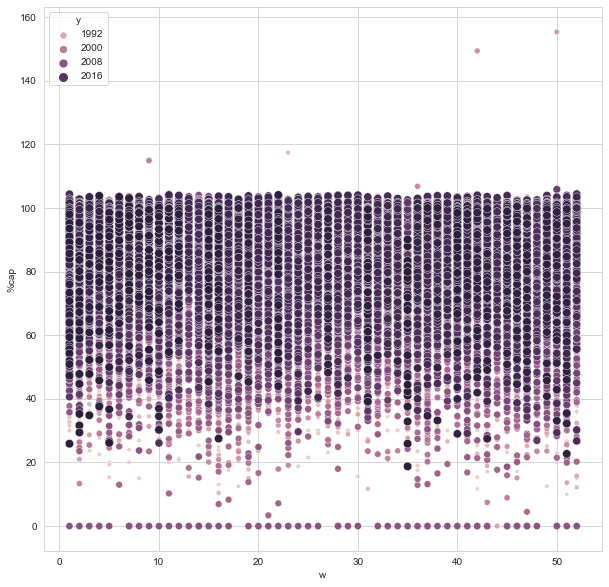

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='w',y='%cap',hue='y',size='y')

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_2005['w'],data_2005['Difference'])

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_2005['w'],data_2005['Average_ticket'])

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data['w'],data['Seats_Sold'])

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_2005['w'],data_2005['Seats_Sold'])